In [324]:
import pandas as pd 

In [325]:
train_data = pd.read_csv('train.csv',dtype=str)
test_data = pd.read_csv('test.csv',dtype=str)


In [326]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,NaN,S


In [327]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,S


In [328]:
print("Missing data in training dataset:")
print(train_data.isnull().sum())
print("\nPercentage of missing data in training dataset:")
print(train_data.isnull().sum() / len(train_data) * 100)

Missing data in training dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Percentage of missing data in training dataset:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [329]:

print("Missing data in testing dataset:")
print(test_data.isnull().sum())
print("\nPercentage of missing data in testing dataset:")
print(test_data.isnull().sum() / len(test_data) * 100)

Missing data in testing dataset:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Percentage of missing data in testing dataset:
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64


In [330]:
# Convert Age and Fare to numeric types
train_data['Age'] = pd.to_numeric(train_data['Age'], errors='coerce')
train_data['Fare'] = pd.to_numeric(train_data['Fare'], errors='coerce')

test_data['Age'] = pd.to_numeric(test_data['Age'], errors='coerce')
test_data['Fare'] = pd.to_numeric(test_data['Fare'], errors='coerce')

# Now fill missing values with median
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].median())

test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())



In [331]:

# Fill missing Embarked values with mode
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])


In [332]:
# Check for any remaining missing values
print("Missing data in training dataset after cleaning:")
print(train_data.isnull().sum())
print("\nMissing data in testing dataset after cleaning:")
print(test_data.isnull().sum())


Missing data in training dataset after cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Missing data in testing dataset after cleaning:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [333]:
# Drop Cabin column due to high percentage of missing data (77% in train, 78% in test)
train_data = train_data.drop('Cabin', axis=1)
test_data = test_data.drop('Cabin', axis=1)



In [334]:
# Display the cleaned training data
print("Cleaned Training Data:")
print(train_data.head())
print(f"\nShape: {train_data.shape}")






Cleaned Training Data:
  PassengerId Survived Pclass  \
0           1        0      3   
1           2        1      1   
2           3        1      3   
3           4        1      1   
4           5        0      3   

                                                Name     Sex   Age SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0     1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0     1   
2                             Heikkinen, Miss. Laina  female  26.0     0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0     1   
4                           Allen, Mr. William Henry    male  35.0     0   

  Parch            Ticket     Fare Embarked  
0     0         A/5 21171   7.2500        S  
1     0          PC 17599  71.2833        C  
2     0  STON/O2. 3101282   7.9250        S  
3     0            113803  53.1000        S  
4     0            373450   8.0500        S  

Shape: (891, 11)


In [335]:
# Display the cleaned testing data
print("Cleaned Testing Data:")
print(test_data.head())
print(f"\nShape: {test_data.shape}")

Cleaned Testing Data:
  PassengerId Pclass                                          Name     Sex  \
0         892      3                              Kelly, Mr. James    male   
1         893      3              Wilkes, Mrs. James (Ellen Needs)  female   
2         894      2                     Myles, Mr. Thomas Francis    male   
3         895      3                              Wirz, Mr. Albert    male   
4         896      3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age SibSp Parch   Ticket     Fare Embarked  
0  34.5     0     0   330911   7.8292        Q  
1  47.0     1     0   363272   7.0000        S  
2  62.0     0     0   240276   9.6875        Q  
3  27.0     0     0   315154   8.6625        S  
4  22.0     1     1  3101298  12.2875        S  

Shape: (418, 10)


In [336]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S


In [337]:
# One-hot encode categorical variables
# Sex: male/female
train_data = pd.get_dummies(train_data, columns=['Sex'], prefix='Sex', drop_first=False)
test_data = pd.get_dummies(test_data, columns=['Sex'], prefix='Sex', drop_first=False)

# Embarked: C/Q/S
train_data = pd.get_dummies(train_data, columns=['Embarked'], prefix='Embarked', drop_first=False)
test_data = pd.get_dummies(test_data, columns=['Embarked'], prefix='Embarked', drop_first=False)

# Pclass: 1/2/3
train_data = pd.get_dummies(train_data, columns=['Pclass'], prefix='Pclass', drop_first=False)
test_data = pd.get_dummies(test_data, columns=['Pclass'], prefix='Pclass', drop_first=False)

print("Training data after one-hot encoding:")
print(train_data.head())
print(f"\nShape: {train_data.shape}")




Training data after one-hot encoding:
  PassengerId Survived                                               Name  \
0           1        0                            Braund, Mr. Owen Harris   
1           2        1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           3        1                             Heikkinen, Miss. Laina   
3           4        1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           5        0                           Allen, Mr. William Henry   

    Age SibSp Parch            Ticket     Fare  Sex_female  Sex_male  \
0  22.0     1     0         A/5 21171   7.2500       False      True   
1  38.0     1     0          PC 17599  71.2833        True     False   
2  26.0     0     0  STON/O2. 3101282   7.9250        True     False   
3  35.0     1     0            113803  53.1000        True     False   
4  35.0     0     0            373450   8.0500       False      True   

   Embarked_C  Embarked_Q  Embarked_S  Pclass_1  Pclass_2  Pclass_

In [338]:
print("\nTesting data after one-hot encoding:")
print(test_data.head())
print(f"\nShape: {test_data.shape}")


Testing data after one-hot encoding:
  PassengerId                                          Name   Age SibSp Parch  \
0         892                              Kelly, Mr. James  34.5     0     0   
1         893              Wilkes, Mrs. James (Ellen Needs)  47.0     1     0   
2         894                     Myles, Mr. Thomas Francis  62.0     0     0   
3         895                              Wirz, Mr. Albert  27.0     0     0   
4         896  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  22.0     1     1   

    Ticket     Fare  Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  \
0   330911   7.8292       False      True       False        True       False   
1   363272   7.0000        True     False       False       False        True   
2   240276   9.6875       False      True       False        True       False   
3   315154   8.6625       False      True       False       False        True   
4  3101298  12.2875        True     False       False       False     

In [339]:
# Apply MinMaxScaler to numerical features
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Identify numerical columns to scale (excluding PassengerId and Survived)
numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']

# Fit and transform the training data
train_data[numerical_cols] = scaler.fit_transform(train_data[numerical_cols])

# Transform the test data using the same scaler
test_data[numerical_cols] = scaler.transform(test_data[numerical_cols])

print("Data after MinMaxScaler:")
print("\nTraining data:")
print(train_data.head())
print(f"\nShape: {train_data.shape}")




Data after MinMaxScaler:

Training data:
  PassengerId Survived                                               Name  \
0           1        0                            Braund, Mr. Owen Harris   
1           2        1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           3        1                             Heikkinen, Miss. Laina   
3           4        1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           5        0                           Allen, Mr. William Henry   

        Age  SibSp  Parch            Ticket      Fare  Sex_female  Sex_male  \
0  0.271174  0.125    0.0         A/5 21171  0.014151       False      True   
1  0.472229  0.125    0.0          PC 17599  0.139136        True     False   
2  0.321438  0.000    0.0  STON/O2. 3101282  0.015469        True     False   
3  0.434531  0.125    0.0            113803  0.103644        True     False   
4  0.434531  0.000    0.0            373450  0.015713       False      True   

   Embarked_C  Embark

In [340]:
print("\nTesting data:")
print(test_data.head())
print(f"\nShape: {test_data.shape}")



Testing data:
  PassengerId                                          Name       Age  SibSp  \
0         892                              Kelly, Mr. James  0.428248  0.000   
1         893              Wilkes, Mrs. James (Ellen Needs)  0.585323  0.125   
2         894                     Myles, Mr. Thomas Francis  0.773813  0.000   
3         895                              Wirz, Mr. Albert  0.334004  0.000   
4         896  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  0.271174  0.125   

      Parch   Ticket      Fare  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
0  0.000000   330911  0.015282       False      True       False        True   
1  0.000000   363272  0.013663        True     False       False       False   
2  0.000000   240276  0.018909       False      True       False        True   
3  0.000000   315154  0.016908       False      True       False       False   
4  0.166667  3101298  0.023984        True     False       False       False   

   Embarked_S  Pclass_1

In [341]:
# Feature Engineering
# Create new features that might be useful for prediction

# 1. Family Size: Combine SibSp and Parch
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# 2. IsAlone: Binary feature indicating if passenger is traveling alone
train_data['IsAlone'] = (train_data['FamilySize'] == 1).astype(int)
test_data['IsAlone'] = (test_data['FamilySize'] == 1).astype(int)

# 3. Title extraction from Name (if Name column still exists)
if 'Name' in train_data.columns:
    train_data['Title'] = train_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
    test_data['Title'] = test_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
    
    # Group rare titles
    title_mapping = {
        'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master',
        'Dr': 'Rare', 'Rev': 'Rare', 'Col': 'Rare', 'Major': 'Rare',
        'Mlle': 'Miss', 'Mme': 'Mrs', 'Don': 'Rare', 'Dona': 'Rare',
        'Lady': 'Rare', 'Countess': 'Rare', 'Jonkheer': 'Rare', 'Sir': 'Rare',
        'Capt': 'Rare', 'Ms': 'Miss'
    }
    train_data['Title'] = train_data['Title'].map(title_mapping).fillna('Rare')
    test_data['Title'] = test_data['Title'].map(title_mapping).fillna('Rare')
    
    # One-hot encode Title
    train_data = pd.get_dummies(train_data, columns=['Title'], prefix='Title')
    test_data = pd.get_dummies(test_data, columns=['Title'], prefix='Title')
    
    # Align columns between train and test
    train_cols = set(train_data.columns)
    test_cols = set(test_data.columns)
    
    # Add missing columns to test data
    for col in train_cols - test_cols:
        if col != 'Survived':
            test_data[col] = 0
    
    # Add missing columns to train data (shouldn't happen but just in case)
    for col in test_cols - train_cols:
        train_data[col] = 0

# 4. Fare per person (if traveling with family)
train_data['FarePerPerson'] = train_data['Fare'] / train_data['FamilySize']
test_data['FarePerPerson'] = test_data['Fare'] / test_data['FamilySize']



In [342]:
train_data


,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,...,Pclass_2,Pclass_3,FamilySize,IsAlone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,FarePerPerson
0,1,0,"Braund, Mr. Owen Harris",0.271174,0.125,0.000000,A/5 21171,0.014151,False,True,...,False,True,1.125000,0,False,False,True,False,False,0.012579
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.472229,0.125,0.000000,PC 17599,0.139136,True,False,...,False,False,1.125000,0,False,False,False,True,False,0.123676
2,3,1,"Heikkinen, Miss. Laina",0.321438,0.000,0.000000,STON/O2. 3101282,0.015469,True,False,...,False,True,1.000000,1,False,True,False,False,False,0.015469
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.434531,0.125,0.000000,113803,0.103644,True,False,...,False,False,1.125000,0,False,False,False,True,False,0.092128
4,5,0,"Allen, Mr. William Henry",0.434531,0.000,0.000000,373450,0.015713,False,True,...,False,True,1.000000,1,False,False,True,False,False,0.015713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",0.334004,0.000,0.000000,211536,0.025374,False,True,...,True,False,1.000000,1,False,False,False,False,True,0.025374
887,888,1,"Graham, Miss. Margaret Edith",0.233476,0.000,0.000000,112053,0.058556,True,False,...,False,False,1.000000,1,False,True,False,False,False,0.058556
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",0.346569,0.125,0.333333,W./C. 6607,0.045771,True,False,...,False,True,1.458333,0,False,True,False,False,False,0.031386
889,890,1,"Behr, Mr. Karl Howell",0.321438,0.000,0.000000,111369,0.058556,False,True,...,False,False,1.000000,1,False,False,True,False,False,0.058556


In [343]:
test_data


,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,...,Pclass_2,Pclass_3,FamilySize,IsAlone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,FarePerPerson
0,892,"Kelly, Mr. James",0.428248,0.000,0.000000,330911,0.015282,False,True,False,...,False,True,1.000000,1,False,False,True,False,False,0.015282
1,893,"Wilkes, Mrs. James (Ellen Needs)",0.585323,0.125,0.000000,363272,0.013663,True,False,False,...,False,True,1.125000,0,False,False,False,True,False,0.012145
2,894,"Myles, Mr. Thomas Francis",0.773813,0.000,0.000000,240276,0.018909,False,True,False,...,True,False,1.000000,1,False,False,True,False,False,0.018909
3,895,"Wirz, Mr. Albert",0.334004,0.000,0.000000,315154,0.016908,False,True,False,...,False,True,1.000000,1,False,False,True,False,False,0.016908
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0.271174,0.125,0.166667,3101298,0.023984,True,False,False,...,False,True,1.291667,0,False,False,False,True,False,0.018568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,"Spector, Mr. Woolf",0.334004,0.000,0.000000,A.5. 3236,0.015713,False,True,False,...,False,True,1.000000,1,False,False,True,False,False,0.015713
414,1306,"Oliva y Ocana, Dona. Fermina",0.484795,0.000,0.000000,PC 17758,0.212559,True,False,True,...,False,False,1.000000,1,False,False,False,False,True,0.212559
415,1307,"Saether, Mr. Simon Sivertsen",0.478512,0.000,0.000000,SOTON/O.Q. 3101262,0.014151,False,True,False,...,False,True,1.000000,1,False,False,True,False,False,0.014151
416,1308,"Ware, Mr. Frederick",0.334004,0.000,0.000000,359309,0.015713,False,True,False,...,False,True,1.000000,1,False,False,True,False,False,0.015713


In [344]:
# Calculate IQR for Age and Fare
age_q1 = train_data['Age'].quantile(0.25)
age_q3 = train_data['Age'].quantile(0.75)
age_iqr = age_q3 - age_q1

fare_q1 = train_data['Fare'].quantile(0.25)
fare_q3 = train_data['Fare'].quantile(0.75)
fare_iqr = fare_q3 - fare_q1

print(f"Age IQR: {age_iqr:.2f} (Q1: {age_q1:.2f}, Q3: {age_q3:.2f})")
print(f"Fare IQR: {fare_iqr:.2f} (Q1: {fare_q1:.2f}, Q3: {fare_q3:.2f})")


Age IQR: 0.16 (Q1: 0.27, Q3: 0.43)
Fare IQR: 0.05 (Q1: 0.02, Q3: 0.06)


In [345]:
# Prepare features (X) and target (y)
X = train_data.drop(['PassengerId', 'Survived', 'Name'], axis=1)
y = train_data['Survived']



Using 7 numeric features: ['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'FarePerPerson']
Fitting 5 folds for each of 90 candidates, totalling 450 fits


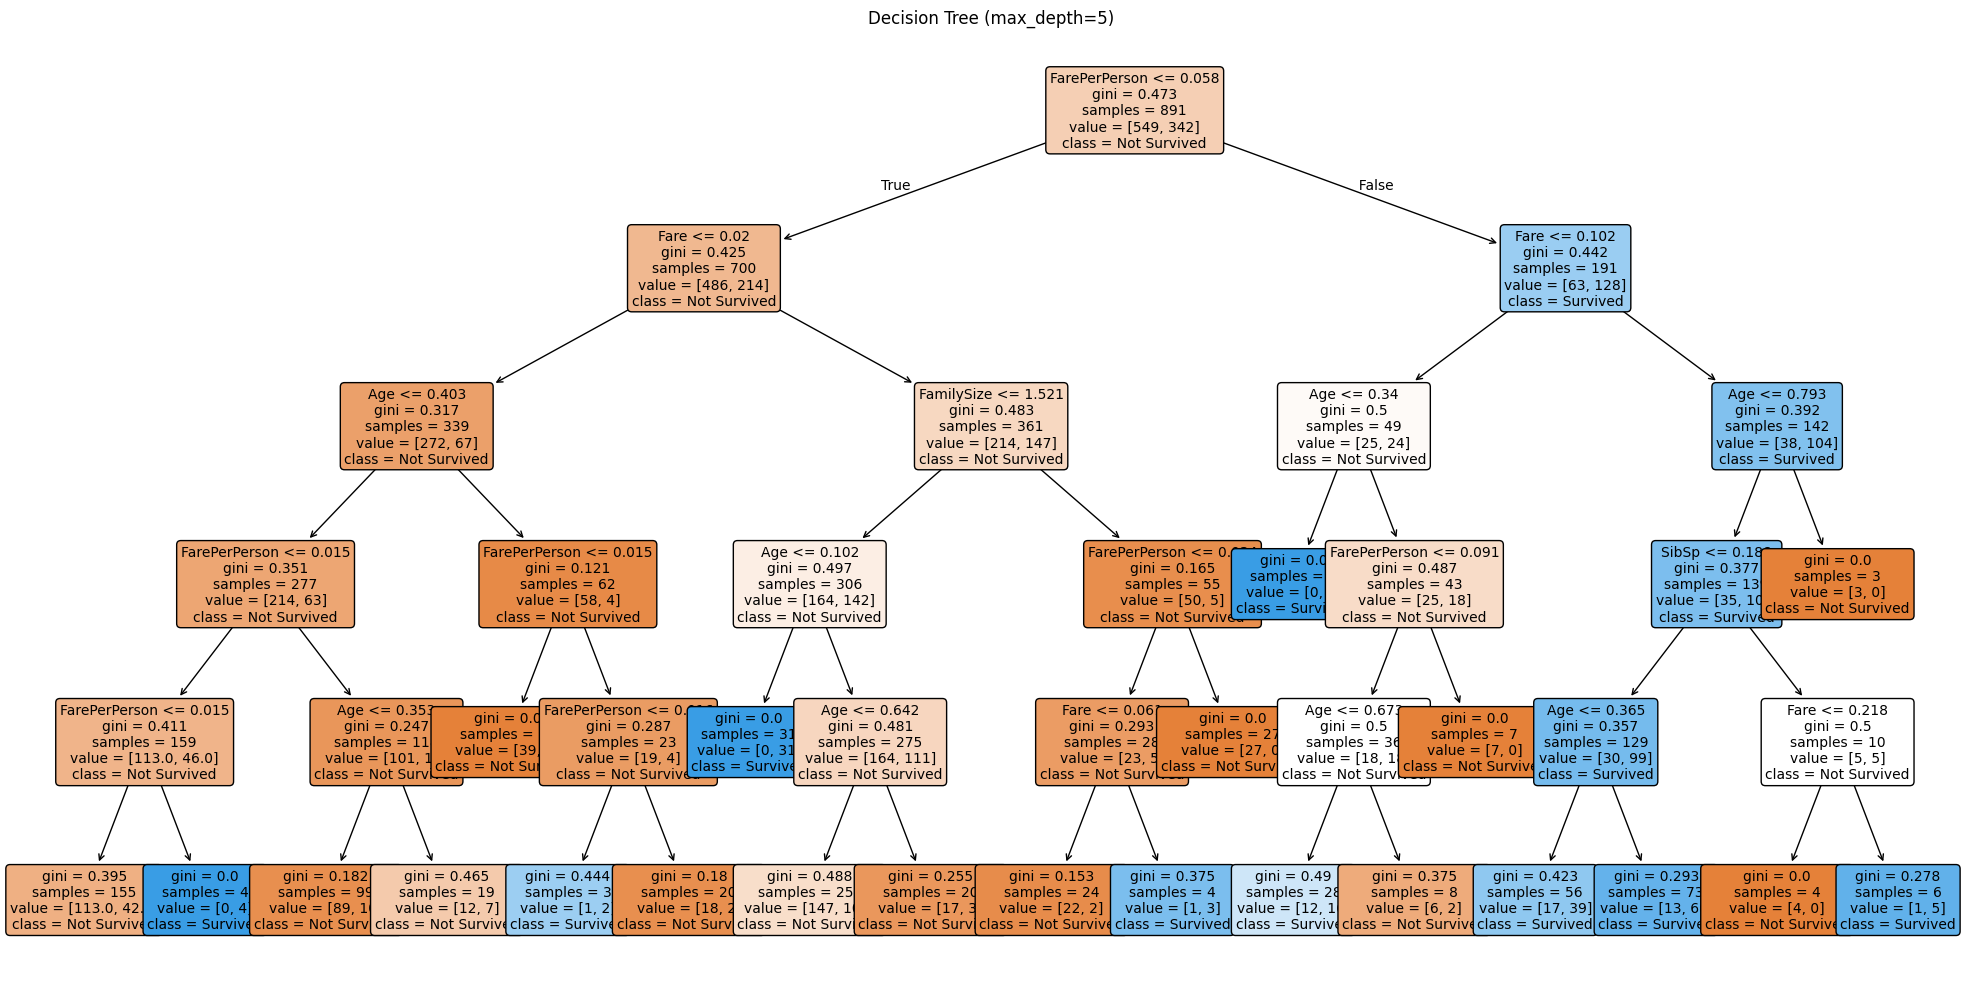

In [346]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree



# Select only numeric columns for the decision tree
X_numeric = X.select_dtypes(include=['number'])

print(f"\nUsing {len(X_numeric.columns)} numeric features: {X_numeric.columns.tolist()}")

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=dt_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit the model with numeric features only
grid_search.fit(X_numeric, y)


# Get the best model
best_dt = grid_search.best_estimator_

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    best_dt,
    feature_names=X_numeric.columns,
    class_names=['Not Survived', 'Survived'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title(f"Decision Tree (max_depth={best_dt.max_depth})")
plt.tight_layout()
plt.show()




In [347]:
# Perform cross-validation with the best model
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_dt, X_numeric, y, cv=5, scoring='accuracy')

average_accuracy = cv_scores.mean()

print(average_accuracy)

0.7093716653066349


In [348]:
# Random Forest Classifier with Cross-Validation
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Perform GridSearchCV with cross-validation
rf_grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=rf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit the model with numeric features
rf_grid_search.fit(X_numeric, y)

# Get the best Random Forest model
best_rf = rf_grid_search.best_estimator_


# Perform cross-validation with the best model
rf_cv_scores = cross_val_score(best_rf, X_numeric, y, cv=5, scoring='accuracy')
rf_average_accuracy = rf_cv_scores.mean()

print(f"Random Forest Average Accuracy: {rf_average_accuracy:.4f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Random Forest Average Accuracy: 0.7330
